# Pneumonia X-Ray detection

## Import Libraries

In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Download pneumonia dataset

The dataset will be placed in the `dataset` folder, with the following tree structure:
```
├── dataset
│   └── chest_xray
│       ├── chest_xray
│       │   ├── test
│       │   │   ├── NORMAL
│       │   │   └── PNEUMONIA
│       │   ├── train
│       │   │   ├── NORMAL
│       │   │   └── PNEUMONIA
│       │   └── val
│       │       ├── NORMAL
│       │       └── PNEUMONIA
```

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Setup kaggle with kaggle.json in "MyDrive" ("Il Mio Drive") folder

# install the Kaggle library
!pip install kaggle

# make a directory named “.kaggle”
!mkdir ~/.kaggle

# copy the “kaggle.json” into this new directory
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

# allocate the required permission for this file
!chmod 600 ~/.kaggle/kaggle.json

# download pneumonia dataset
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

# unzip it into dataset folder
!mkdir dataset
!unzip chest-xray-pneumonia.zip -d dataset


## Import and explore data

In [3]:
print("importing dataset...")

data_dir = Path('dataset/chest_xray/chest_xray')
train_dir = data_dir/'train'
val_dir = data_dir/'val'
test_dir = data_dir/'test'

def load_set_from_dir(base_dir: Path):
  normal_dir = base_dir / 'NORMAL'
  normal_cases = normal_dir.glob('*.jpeg')
  pneumonia_dir = base_dir / 'PNEUMONIA'
  pneumonia_cases = pneumonia_dir.glob('*.jpeg')

  data = []
  label = []
  
  for sample in normal_cases:
    data.append(sample)
    label.append('NORMAL')
  for sample in pneumonia_cases:
    data.append(sample)
    label.append('PNEUMONIA')
  
  df = pd.DataFrame(data)
  df.rename(columns = {0 : 'image'}, inplace=True)  
  df['label'] = label

  # shuffle the data
  df = df.sample(frac=1).reset_index(drop=True)

  return df

print("loading train...")
train_data = load_set_from_dir(train_dir)
print("loading validation...")
val_data = load_set_from_dir(val_dir)
print("loading test...")
test_data = load_set_from_dir(test_dir)
print("\neverything loaded.")


importing dataset...
loading train...
loading validation...
loading test...

everything loaded.


In [4]:
# explore the data

print('train data infos:\n')
# print(train_data.info())
# print()
print(train_data['label'].value_counts())
print("""
!!!
This doesn’t look good, our trainig data is imbalanced. 
The number of images containing pneumonia is three times the number of normal images. 
Honestly, this is a fundamental problem with most medical datasets out there, 
as the people who go to a doctor with an ailment mostly have one.
!!!
      """)
print()
print(train_data.head(3))
print('\n...')
print(train_data.tail(2))
print()


train data infos:

PNEUMONIA    3875
NORMAL       1341
Name: label, dtype: int64

!!!
This doesn’t look good, our trainig data is imbalanced. 
The number of images containing pneumonia is three times the number of normal images. 
Honestly, this is a fundamental problem with most medical datasets out there, 
as the people who go to a doctor with an ailment mostly have one.
!!!
      

                                               image      label
0  dataset/chest_xray/chest_xray/train/PNEUMONIA/...  PNEUMONIA
1  dataset/chest_xray/chest_xray/train/PNEUMONIA/...  PNEUMONIA
2  dataset/chest_xray/chest_xray/train/PNEUMONIA/...  PNEUMONIA

...
                                                  image      label
5214  dataset/chest_xray/chest_xray/train/PNEUMONIA/...  PNEUMONIA
5215  dataset/chest_xray/chest_xray/train/PNEUMONIA/...  PNEUMONIA



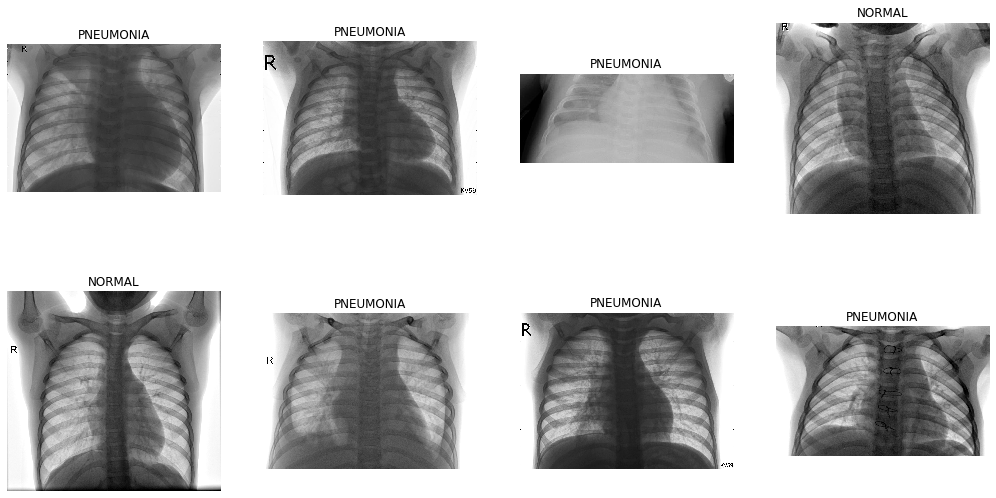

In [5]:
# display some sample images

n_rows = 2
n_cols = 4
plt.figure(figsize=(n_cols * 4.4, n_rows * 4.6))
for row in range(n_rows):
    for col in range(n_cols):
        position = n_cols * row + col
        plt.axis('off')
        plt.subplot(n_rows, n_cols, position + 1)
        image = plt.imread(train_data['image'].iloc[position])
        plt.imshow(image, cmap="binary", interpolation="nearest")
        title = train_data['label'].iloc[position]
        plt.title(title)
plt.show()


## Preprocessing

## Model definition

## Training

## Model evaluation